Постройте диаграмму (или график), которая показывает, как по возрастным сегментам отличается конверсия в утилизацию.

In [2]:
from datetime import datetime as dt
from datetime import date
from datetime import timedelta as timedelta
from dateutil.relativedelta import relativedelta

import pandas as pd
import numpy as np

import math

import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
df = pd.read_excel('tinkoff_vis.xls')

In [4]:
df

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN
...,...,...,...,...,...,...
2372,835630,1991-01-05,2019-04-05 11:00:17,NaN,NaT,NaN
2373,835634,1991-09-06,2019-04-05 12:19:05,1.299279e+09,2019-04-07,4000.0
2374,835650,1993-09-02,2019-04-05 12:26:39,1.299387e+09,2019-04-08,1500.0
2375,835666,1998-05-15,2019-04-05 13:16:37,NaN,NaT,NaN


In [5]:
reg_dt = list(map(lambda x: dt.date(x), df['reg_dttm'].tolist()))
client_age = list(map(lambda x: relativedelta(dt.now(), x).years , df['birth_dt']))

df0 = pd.DataFrame(zip(df.purchase_dt, client_age,), columns = ['purchase_dt', 'client_age'])

In [6]:
def find_age_groups(ages):
    age_groups_list = []
    for age in ages:
        if 18 <= age < 25:
           age_groups_list.append('18-24') 
        elif 25 <= age < 35:
            age_groups_list.append('25-34')
        elif 35 <= age < 45:
            age_groups_list.append('35-44')
        elif age >= 45:
            age_groups_list.append('45+')
    return age_groups_list

In [7]:
df0.loc[:, 'age_group'] = find_age_groups(client_age)
df0 = df0.drop(columns = 'client_age')

In [8]:
df0

,purchase_dt,age_group
0,NaT,25-34
1,NaT,45+
2,2019-02-12,25-34
3,NaT,35-44
4,NaT,25-34
...,...,...
2372,NaT,25-34
2373,2019-04-07,25-34
2374,2019-04-08,25-34
2375,NaT,18-24


In [9]:
age_groups = ['18-24', '25-34', '35-44','45+']

In [10]:
age_groups = ['18-24', '25-34', '35-44','45+']
dict1 = {}
for age_group in age_groups:
    a = df0.groupby('age_group').get_group(age_group).count().values
    dict1[age_group] = (a[0] / a[1])

In [11]:
dict1

{'18-24': 0.56,
 '25-34': 0.48086124401913877,
 '35-44': 0.5169712793733682,
 '45+': 0.5265017667844523}

In [87]:
df0.groupby('age_group').get_group('18-24').count()

purchase_dt    490
age_group      875
dtype: int64

In [125]:
val = np.float32(0)
final_dict = {k: round(v.item(), 4) for k, v in zip(dict1.keys(), dict1.values())}
final_dict

{'18-24': 0.56, '25-34': 0.4809, '35-44': 0.517, '45+': 0.5265}

Text(0, 0.5, 'Age group')

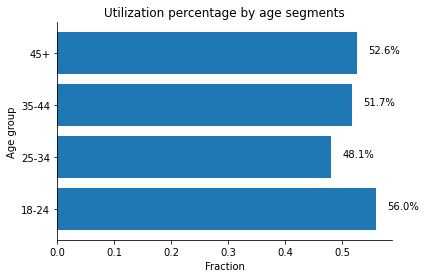

In [168]:
fig, ax = plt.subplots()
barh = ax.barh(np.arange(len(final_dict)),
        final_dict.values(),
        tick_label = list(final_dict.keys())
        )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

total = len(final_dict)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
ax.set_title('Utilization percentage by age segments')
ax.set_xlabel('Fraction')
ax.set_ylabel('Age group')